In [2]:
import torch

### This 

In [20]:
tensor = torch.ones(5,5)
dropout = torch.nn.Dropout(p=0.5)
dropout(tensor)

tensor([[2., 0., 0., 0., 2.],
        [0., 2., 2., 2., 0.],
        [2., 0., 0., 2., 2.],
        [2., 2., 2., 0., 0.],
        [2., 0., 0., 2., 0.]])

In [29]:
torch.rand_like(tensor)

tensor([[0.8989, 0.7780, 0.4452, 0.1347, 0.3191],
        [0.0531, 0.5557, 0.5634, 0.2644, 0.3673],
        [0.8095, 0.8619, 0.2596, 0.4709, 0.6162],
        [0.1551, 0.7547, 0.2622, 0.5518, 0.0726],
        [0.6100, 0.9744, 0.1473, 0.1328, 0.6549]])

In [32]:
import torch

class CustomDropout:
    def __init__(self, p=0.5):
        self.p = p  # Dropout probability

    def __call__(self, x, train=True):
        if not train:
            return x  # No dropout during evaluation

        # Step 1: Generate a binary mask where units are kept with probability (1 - p)
        mask = (torch.rand_like(x) > self.p).float()

        # Step 2: Apply the mask to the input
        x = x * mask

        # Step 3: Scale the output to maintain the same expected value
        x = x / (1 - self.p)
        
        return x

# Usage Example
dropout = CustomDropout(p=0.5)
x = torch.randn(5, 5)  # Example input tensor

# During training
x_train = dropout(x, train=True)

# During evaluation (no dropout)
x_eval = dropout(x, train=False)

# Output shapes remain the same
print("Training output:", x_train.shape)
print("Evaluation output:", x_eval.shape)

Training output: torch.Size([5, 5])
Evaluation output: torch.Size([5, 5])


In [33]:
x_train

tensor([[ 0.6036,  0.0000, -0.4247,  0.9966, -0.8892],
        [ 1.4521,  1.4721, -0.0000,  1.8884,  0.0000],
        [-0.9812, -2.0189, -0.0000,  2.0039, -2.5256],
        [-0.0000, -0.0000,  0.0000, -0.0000,  0.0000],
        [-0.1583,  2.3454,  0.4992, -0.0000,  0.0233]])

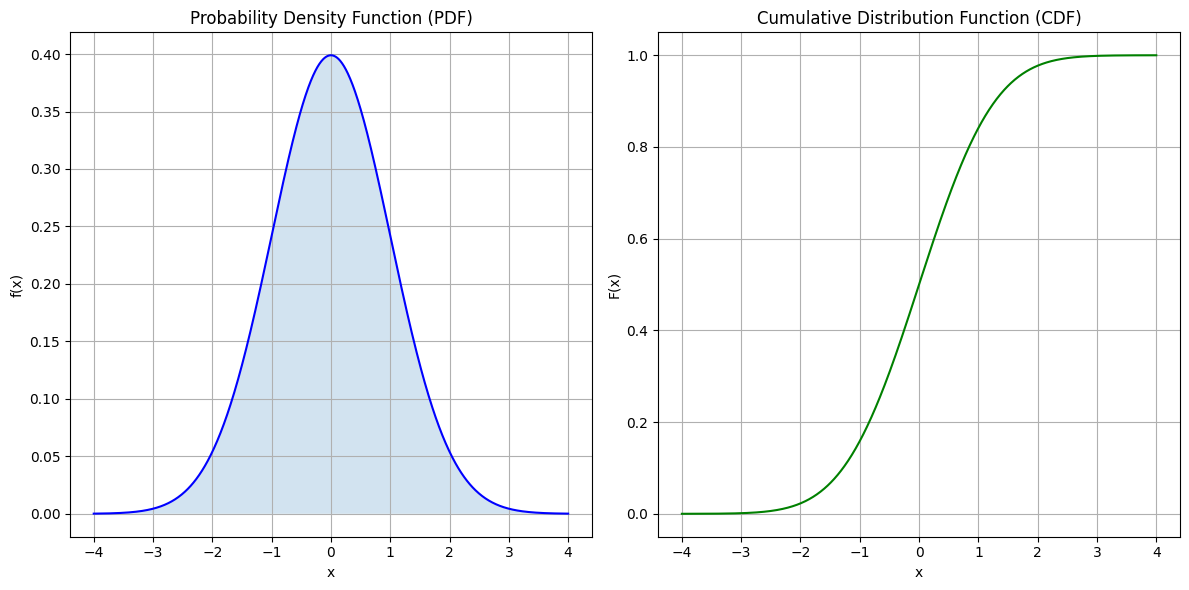

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters for the normal distribution
mean = 0   # Mean
std_dev = 1  # Standard Deviation

# Generate values for the x-axis
x = np.linspace(-4, 4, 1000)

# Calculate PDF and CDF using scipy's norm
pdf = norm.pdf(x, mean, std_dev)  # Probability Density Function
cdf = norm.cdf(x, mean, std_dev)  # Cumulative Distribution Function

# Create the plots
plt.figure(figsize=(12, 6))

# Plot PDF
plt.subplot(1, 2, 1)
plt.plot(x, pdf, label='PDF', color='blue')
plt.title('Probability Density Function (PDF)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.fill_between(x, pdf, alpha=0.2)

# Plot CDF
plt.subplot(1, 2, 2)
plt.plot(x, cdf, label='CDF', color='green')
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.grid(True)

# Show plots
plt.tight_layout()
plt.show()